In [19]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Connect to SQL Server database

In [20]:

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=ENRIQUE_PC;'
                      'Database=AdventureWorks2019;'
                      'Trusted_Connection=yes;')

Option #1

C:\Users\eagua\AppData\Local\Temp\ipykernel_6992\2435242335.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salesdata = pd.read_sql(query, conn)


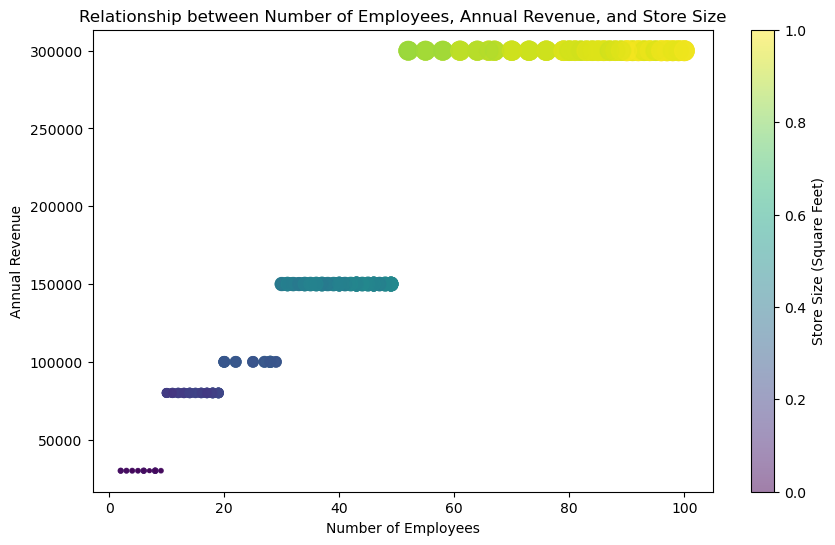

In [21]:
# Execute SQL query and read into DataFrame
query = 'SELECT SquareFeet, NumberEmployees, AnnualRevenue FROM Sales.vStoreWithDemographics'
salesdata = pd.read_sql(query, conn)

# Normalize SquareFeet for better visibility in the plot
min_size = salesdata['SquareFeet'].min()
max_size = salesdata['SquareFeet'].max()
scaled_size = (salesdata['SquareFeet'] - min_size) / (max_size - min_size) * 200  # scaling between 0 and 200
scaled_color = (salesdata['SquareFeet'] - min_size) / (max_size - min_size)  # scaling between 0 and 1 for color

# Create scatter plot
plt.figure(figsize=(10, 6))
sc = plt.scatter(salesdata['NumberEmployees'], salesdata['AnnualRevenue'], c=scaled_color, s=scaled_size, alpha=0.5, cmap='viridis')

# Add titles and labels
plt.title('Relationship between Number of Employees, Annual Revenue, and Store Size')
plt.xlabel('Number of Employees')
plt.ylabel('Annual Revenue')

# Add color bar to represent the size of stores
cbar = plt.colorbar(sc)
cbar.set_label('Store Size (Square Feet)')

# Show plot
plt.show()

To effectively visualize all three variables in a single graph, the size and colors of the circles are mapped to the store size. This approach provides a simple yet informative representation of the data.

Option #2

C:\Users\eagua\AppData\Local\Temp\ipykernel_6992\4234387204.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salesdata = pd.read_sql(query, conn)


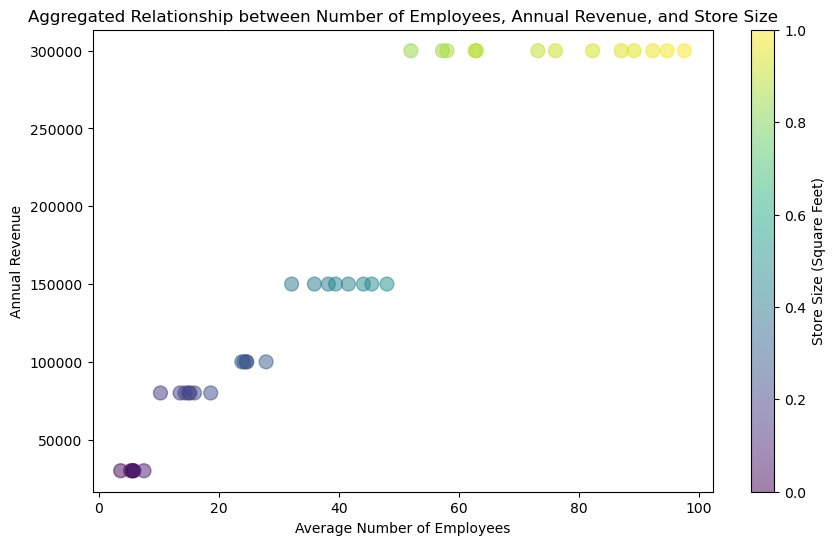

In [22]:
# Execute SQL query and read into DataFrame
query = 'SELECT SquareFeet, NumberEmployees, AnnualRevenue FROM Sales.vStoreWithDemographics'
salesdata = pd.read_sql(query, conn)

# Group by SquareFeet and AnnualRevenue and calculate the mean number of employees for each group
grouped_data = salesdata.groupby(['SquareFeet', 'AnnualRevenue'])['NumberEmployees'].mean().reset_index()

# Normalize SquareFeet for better visibility and color representation
min_size = grouped_data['SquareFeet'].min()
max_size = grouped_data['SquareFeet'].max()
scaled_color = (grouped_data['SquareFeet'] - min_size) / (max_size - min_size)  # scaling between 0 and 1 for color

# Create scatter plot
plt.figure(figsize=(10, 6))
sc = plt.scatter(grouped_data['NumberEmployees'], grouped_data['AnnualRevenue'], c=scaled_color, s=100, alpha=0.5, cmap='viridis')

# Add titles and labels
plt.title('Aggregated Relationship between Number of Employees, Annual Revenue, and Store Size')
plt.xlabel('Average Number of Employees')
plt.ylabel('Annual Revenue')

# Add color bar to represent the size of stores
cbar = plt.colorbar(sc)
cbar.set_label('Store Size (Square Feet)')

# Show plot
plt.show()

# Close the database connection
conn.close()

Code to create the graph but we simplified it so the Data was better to read and easier to understand as the circles are not bunched together like in the previous code. 